In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

ModuleNotFoundError: No module named 'tqdm'

In [39]:
#Initialization
f=np.zeros((3,N+1,t_number))
f_sm=np.zeros((3,N+1,t_number))
f0 = np.zeros((3, N+1))
f_middle = np.zeros((3, N+1))
f1 = np.zeros((3, N+1))
f1_smooth = np.zeros((3, N+1))
Q_minus = np.zeros((3))
Q_plus = np.zeros((3))

p1 = 0.7
p2 = 0.8
ro1 = 0.9
ro2 = 1.1
u1 = 1
u2 = 0.6

In [43]:
#Calculation
initial()
for n in tqdm(range(0, t_number)):
    f[:][:,n+1]=nextLayer(f,n,"not smooth")
    f_sm[:][:,n+1]=nextLayer(f,n,"smooth")
r_p_v=getOriginal_r_p_v(f)
r_p_v_sm=getOriginal_r_p_v(f_sm)

NameError: name 'tqdm' is not defined

In [32]:
Courrant=0.01
xleft = 0
xright = 2
xmiddle = 1
h = (xright-xleft)/700
T = 0.1
t_number=(int)(T/t_step)
t_step=Courrant*h
gamma = 1.4
N = int((xright-xleft)/h)
q = 0.05

In [21]:
f=np.zeros((3,N+1,t_number))
f0 = np.zeros((3, N+1))
f_middle = np.zeros((3, N+1))
f1 = np.zeros((3, N+1))
f1_smooth = np.zeros((3, N+1))
Q_minus = np.zeros((3))
Q_plus = np.zeros((3))

In [36]:
def F(f,i):
    F=np.zeros(3)
    F[0]=f[1][i]
    F[1]=f[1][i]**2/f[0][i] + (f[2][i]-f[1][i]**2/(2*f[0][i]))*(gamma-1)
    F[2]=(f[1][i]/f[0][i])*(f[2][i]+(f[2][i]-f[1][i]**2/(2*f[0][i]))*(gamma-1))
    return F

In [34]:
def F_p(vector, param, coordn):
    if param == 0:
        return vector[1, coordn]
    if param == 1:
        return vector[1,coordn]**2/vector[0,coordn] + (vector[2,coordn]-vector[1,coordn]**2/(2*vector[0,coordn]))*(gamma-1)
    if param == 2:
        return (vector[1,coordn]/vector[0,coordn])*(vector[2,coordn]+(vector[2,coordn]-vector[1,coordn]**2/(2*vector[0,coordn]))*(gamma-1))

In [23]:
p1 = 0.7
p2 = 0.8
ro1 = 0.9
ro2 = 1.1
u1 = 1
u2 = 0.6

In [28]:
def initial():
    f[0][:int((xmiddle-xleft)/h),0] = ro1
    f[0][int((xmiddle-xleft)/h)+1:,0] = ro2
    
    f[1][:int((xmiddle-xleft)/h),0] = ro1*u1
    f[1][int((xmiddle-xleft)/h)+1:,0] = ro2*u2
    
    f[2][:int((xmiddle-xleft)/h),0] = p1/(gamma-1) + (ro1*u1)**2/(2*ro1)
    f[2][int((xmiddle-xleft)/h)+1:,0] = p2/(gamma-1) + (ro2*u2)**2/(2*ro2)

def edge(f):
    f[0][0,n] = ro1
    f[0][N,n] = ro2
    
    f[1][0,n] = ro1*u1
    f[1][N,n] = ro2*u2
    
    f[2][0,n] = p1/(gamma-1) + (ro1*u1)**2/(2*ro1)
    f[2][N,n] = p2/(gamma-1) + (ro2*u2)**2/(2*ro2)

In [29]:
for i in range(0, int((xmiddle-xleft)/h)+1):
    f0[0,i] = ro1
    f0[1,i] = ro1*u1
    f0[2,i] = p1/(gamma-1) + (ro1*u1)**2/(2*ro1)
for i in range(int((xmiddle-xleft)/h)+1, N+1):
    f0[0,i] = ro2
    f0[1,i] = ro2*u2
    f0[2,i] = p2/(gamma-1) + (ro2*u2)**2/(2*ro2)

In [30]:
def edge_condition(param, side):
    if side == 0:
        if param == 0:
            return ro1
        if param == 1:
            return ro1*u1
        if param == 2:
            return p1/(gamma-1) + (ro1*u1)**2/(2*ro1)
    if side == 1:
        if param == 0:
            return ro2
        if param == 1:
            return ro2*u2
        if param == 2:
            return p2/(gamma-1) + (ro2*u2)**2/(2*ro2)   

In [38]:
def nextLayer(f0,n,smooth):
    f=f0[:][:,n]
    edge(f)
    edge(f_middle)
    edge(f1)
    edge(f1_smooth)
    
    for i in range(1, N):
        f_middle[:][i] = f[:][i]-Courrant*(F(f, i+1) - F(f,i))
        f1[:][i] = (f[:][i] + f_middle[:][i])/2 - (Courrant/2)*(F(f_middle,i) - F(f_middle,i))
    
    if smooth=="not smooth":
        return f1
    else:
        for j in range(1, N):
            if (j-2)<0:
                j_m2 = 0
            else:
                j_m2 = j-2
            if (j+2)>N:
                j_p2 = N
            else:
                j_p2 = j+2            
            
            Dmm = f1[0,j-1] - f1[0,j_m2]
            Dm = f1[0,j] - f1[0,j-1]
            Dp = f1[0,j+1] - f1[0,j]
            Dpp = f1[0,j_p2] - f1[0,j+1]
            if (Dmm*Dm <= 0) or (Dm*Dp <= 0):
                Q_minus[:]  = f1[:][j] - f1[:][j-1]
            else:
                Q_minus[:]  = 0           
            if (Dm*Dp <= 0) or (Dp*Dpp <= 0):
                Q_plus[:]  = f1[:][j+1] - f1[:][j]                
            else:
                Q_plus[:]  = 0       
    
            f1_smooth[:][j] = f1[:][j] + q*(Q_plus[:]-Q_minus[:])
                
            return f1_smooth

In [13]:
for n in range(0, int(T/tau)):
    for side in range(0,2):
        for param in range(0,3):
            f0[param, side*N] = edge_condition(param, side)
            f_middle[param, side*N] = edge_condition(param, side)
            f1[param, side*N] = edge_condition(param, side)
            f1_smooth[param, side*N] = edge_condition(param, side)
    for i in range(1, N):
        for param in range(0,3):
            f_middle[param, i] = f0[param, i]-(tau/h)*(F_p(f0, param, i+1) - F_p(f0,param,i))
        for param in range(0,3):
            f1[param, i] = (f0[param, i] + f_middle[param, i])/2 - (tau/(2*h))*(F_p(f_middle,param,i) - F_p(f_middle,param,i-1))
    for j in range(1, N):#smooth check
        if (j-2)<0:
            j_m2 = 0
        else:
            j_m2 = j-2
        if (j+2)>N:
            j_p2 = N
        else:
            j_p2 = j+2            
        
        Dmm = f1[0,j-1] - f1[0,j_m2]
        Dm = f1[0,j] - f1[0,j-1]
        Dp = f1[0,j+1] - f1[0,j]
        Dpp = f1[0,j_p2] - f1[0,j+1]
        if (Dmm*Dm <= 0) or (Dm*Dp <= 0):
            for param in range(0,3):
                Q_minus[param]  = f1[param,j] - f1[param, j-1]
        else:
            for param in range(0,3):
                Q_minus[param]  = 0           
        if (Dm*Dp <= 0) or (Dp*Dpp <= 0):
            for param in range(0,3):
                Q_plus[param]  = f1[param,j+1] - f1[param, j]                
        else:
            for param in range(0,3):
                Q_plus[param]  = 0       
                
        for param in range(0,3):                
            f1_smooth[param,j] = f1[param,j] + q*(Q_plus[param]-Q_minus[param])
            
    f0=np.copy(f1_smooth)
    #f0=np.copy(f1)

In [42]:
def getOriginal_r_p_v(f):
    originals=np.zeros_like(f)
    originals[0]=f[0]
    originals[1]=(f[2]-f[1]**2/(2*f[0]))*(gamma-1)
    originals[2]=f[1]/f[0]
    return originals

In [14]:
x = np.zeros((N+1))    
for i in range(0, N+1):
    x[i] = i*h
density = np.zeros((N+1))
for i in range(0, N+1):
    density[i] = f0[0,i]

pressure = np.zeros((N+1))
for i in range(0, N+1):
    pressure[i] = (f0[2,i]-f0[1,i]**2/(2*f0[0,i]))*(gamma-1)
    #pressure[i] = F(f0, 1,i) - f0[1,i]**2/f0[0,i]
    
velocity= np.zeros((N+1))
for i in range(0, N+1):
    velocity[i] = f0[1,i]/f0[0,i]
    
E= np.zeros((N+1))
for i in range(0, N+1):
    E[i] = f0[2,i]

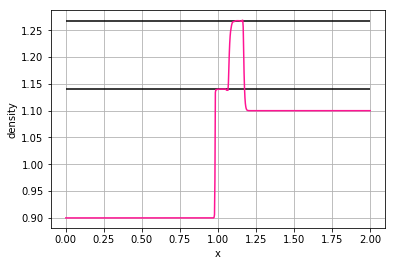

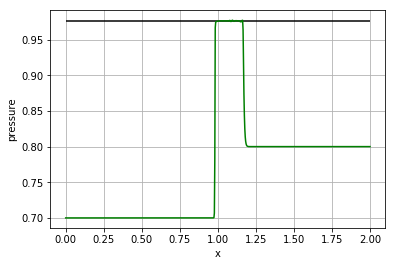

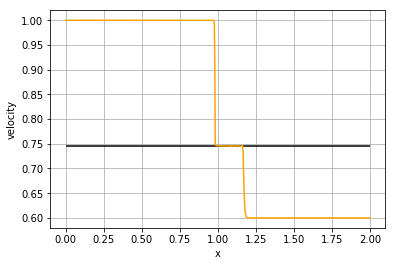

In [15]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.plot(x, density, color='deeppink')
ax1.hlines( 1.140209431480403, 0, 2, color='black')
ax1.hlines(1.267876959316555,0,2, color='black')
ax1.set_xlabel('x')
ax1.set_ylabel('density')
ax1.grid()     

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.plot(x, pressure, color='green')
ax2.hlines(0.9763108174735985, 0, 2,color='black')
ax2.set_xlabel('x')
ax2.set_ylabel('pressure')
ax2.grid() 

fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
ax3.plot(x, velocity, color='orange')
ax3.hlines(0.7456800659375024, 0, 2, color='black')
ax3.set_xlabel('x')
ax3.set_ylabel('velocity')
ax3.grid() 

#fig4 = plt.figure()
#ax4 = fig4.add_subplot(1, 1, 1)
#ax4.plot(x, E, color='blue')
#ax4.set_xlabel('x')
#ax4.set_ylabel('E')
#ax4.grid() 